In [7]:
from pylab import *
from matplotlib.colors import LogNorm
import numpy
import scipy.ndimage
import matplotlib.patches as patches
def sampling_four2real(four,cutoff=2500):
    sample = (fftshift(abs(fft(four)**2)))
    sample[sample<cutoff] = 0
    sample[sample>cutoff] = 1
    return sample


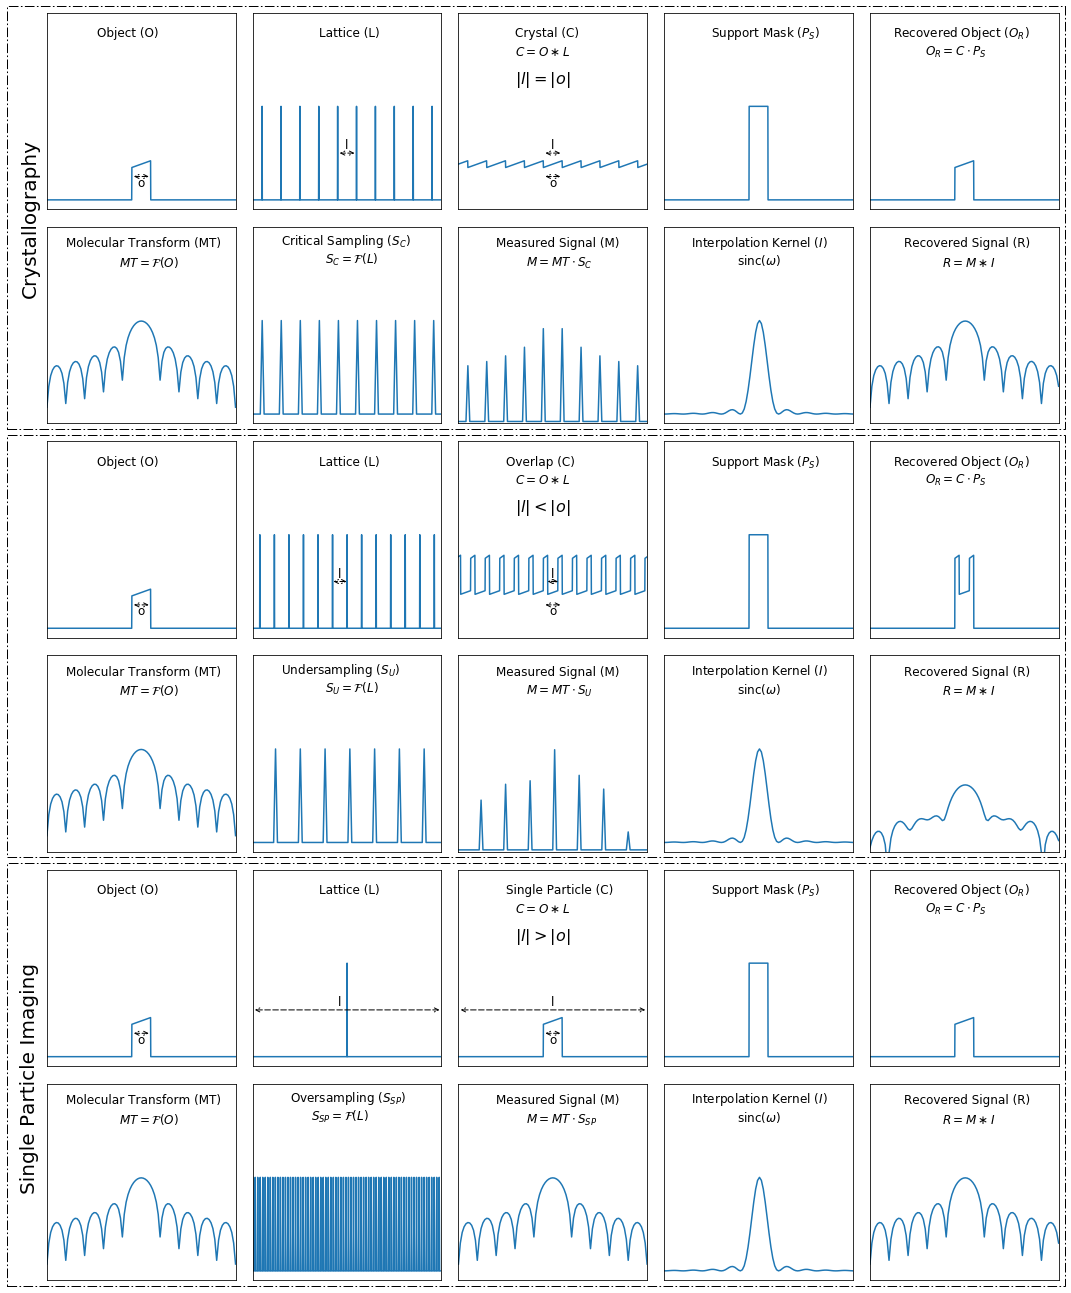

In [321]:
a = numpy.sin(2*numpy.pi*arange(1000)/2000/4)#random(1000)/10+1
x = 450
a[:x] = 0
a[-x:] = 0
particle = a[450:-450]
diff = fft(a)
intensities = (100*fftshift(abs(diff)**2))

critical,oversampling,undersampling = zeros(1000), zeros(1000), zeros(1000)

S = {0:critical,1:oversampling,2:undersampling}
Srate = {0:10,1:13,2:1}
for s in range(3):
    off = Srate[s]/2
    for i in arange(-off,1000+off,Srate[s]): S[s][i] = 1

b = S[1]
sample={}
for i in range(3):
    sample[i] = sampling_four2real(S[i],2500)
    
n=3
fig,ax = subplots(6,5,figsize=(5*n,6*n))
fig.tight_layout()
for axs in ax:
    for a0 in axs:
        a0.set_yticks([])
        a0.set_xticks([])
        a0.set_xmargin(0)
        

for i in range(3):
    crystal = convolve(particle,concatenate((sample[i],sample[i],sample[i])))
    if i == 0: crystal = crystal[1000-100/2:2000-100/2]
    else: crystal = crystal[1050:2050]
    
    ax[i*2][0].plot(a)
    ax[i*2][0].set_ylim([-0.1,2])
    ax[i*2][0].annotate(s='', xy=(450,.25), xytext=(550,.25), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
    
    ax[i*2][0].text(480, 0.15,'o', color='black', fontsize=12)
    ax[i*2][2].text(480, 0.15,'o', color='black', fontsize=12)

    if i==0:off=50
    else: off=0
    ax[i*2][1].plot(concatenate((zeros(off),sample[i]))[0:1000]);
    ax[i*2][1].set_ylim([-0.1,2])

    ax[i*2][2].plot(crystal ); 
    ax[i*2][2].set_ylim([-0.1,2])
    
    ax[i*2][3].plot(a>0)
    ax[i*2][3].set_ylim([-0.1,2])
    ax[i*2][4].plot((a>0)*crystal)
    ax[i*2][3].set_ylim([-0.1,2])
    
    ax[i*2+1][2].text(20, 9,'Measured Signal (M)', color='black', fontsize=12)
    ax[i*2+1][3].text(14, 18000.75,'Interpolation Kernel ($I$)', color='black', fontsize=12)
    ax[i*2+1][3].text(38, 16000,r'sinc($\omega$)', color='black', fontsize=12)
    ax[i*2+1][4].text(18, 9,'Recovered Signal (R)', color='black', fontsize=12)
    ax[i*2+1][4].text(38, 8,r'$R = M \ast I$', color='black', fontsize=12)
      
    ax[i*2+1][0].plot(log10(intensities[450:-449]))
    #ax[i*2+1][0].set_title("Fourier Space\n",fontsize=20)
    ax[i*2+1][0].set_ylim([-0.1,10])
    ax[i*2+1][2].set_ylim([-0.1,10])

    
    if i==2:
        m = [1,0,0,0,0,0]*1000
        ax[i*2+1][1].plot((m)[450:900])
    else:
        
        ax[i*2+1][1].plot((S[i])[450:-450])
    ax[i*2+1][1].set_ylim([-0.1,2])

    
    ax[i*2+1][2].plot( (S[i]*log10(intensities))[450:-449]); 
    ax[i*2+1][2].set_ylim([-0.1,10])

    ax[i*2+1][0].text(10, 9,'Molecular Transform (MT)', color='black', fontsize=12)
    ax[i*2+1][0].text(38, 8,r'$MT = \mathcal{F}(O)$', color='black', fontsize=12)
    ax[i*2][0].text(265, 1.75,'Object (O)', color='black', fontsize=12)
    ax[i*2][1].text(350, 1.75,'Lattice (L)', color='black', fontsize=12)
    ax[i*2][3].text(250, 1.75,r'Support Mask ($P_S$)', color='black', fontsize=12)
    ax[i*2][4].text(120, 1.75,r'Recovered Object ($O_R$)', color='black', fontsize=12)
    ax[i*2][4].text(290, 1.55,r'$O_R = C \cdot P_S$', color='black', fontsize=12)
    ax[i*2][4].set_ylim([-0.1,2])
    
ax[0][2].text(300, 1.75,'Crystal (C)', color='black', fontsize=12)
ax[0][2].text(300, 1.55,r'$C = O \ast L$', color='black', fontsize=12)
ax[0][2].text(300, 1.25,r'$|l| = |o|$', color='black', fontsize=16)

ax[2][2].text(250, 1.75,'Overlap (C)', color='black', fontsize=12)
ax[2][2].text(300, 1.55,r'$C = O \ast L$', color='black', fontsize=12)
ax[2][2].text(300, 1.25,r'$|l| < |o|$', color='black', fontsize=16)

ax[4][2].text(250, 1.75,'Single Particle (C)', color='black', fontsize=12)
ax[4][2].text(300, 1.55,r'$C = O \ast L$', color='black', fontsize=12)
ax[4][2].text(300, 1.25,r'$|l| > |o|$', color='black', fontsize=16)

    
    
ax[1][1].text(15, 1.814,r'Critical Sampling ($S_C$)', color='black', fontsize=12)
ax[1][1].text(38, 1.614, r'$S_C = \mathcal{F}(L)$', color='black', fontsize=12)
ax[1][2].text(36, 8,r'$M = MT \cdot S_C$', color='black', fontsize=12)   
ax[3][1].text(15, 1.814,r'Undersampling ($S_U$)', color='black', fontsize=12)
ax[3][1].text(38, 1.614, r'$S_U = \mathcal{F}(L)$', color='black', fontsize=12)
ax[3][2].text(36, 8,r'$M = MT \cdot S_U$', color='black', fontsize=12)
ax[5][1].text(90, 1.814,r'Oversampling ($S_{SP}$)', color='black', fontsize=12)
ax[5][1].text(140, 1.614,r'$S_{SP} = \mathcal{F}(L)$', color='black', fontsize=12)
ax[5][2].text(36, 8,r'$M = MT \cdot S_{SP}$', color='black', fontsize=12)
   
vv=490
ax[0][1].text(vv, 0.55,'l', color='black', fontsize=12)
ax[2][1].text(450, 0.55,'l', color='black', fontsize=12)
ax[4][1].text(450, 0.55,'l', color='black', fontsize=12)
ax[0][2].text(vv, 0.55,'l', color='black', fontsize=12)
ax[2][2].text(vv, 0.55,'l', color='black', fontsize=12)
ax[4][2].text(vv, 0.55,'l', color='black', fontsize=12)

ax[0][1].text(-1230, 0.5,'Crystallography', color='black', rotation=90, fontsize=20,
        bbox=dict(facecolor='none',edgecolor='white'))
ax[4][1].text(-1230, 0.85,'Single Particle Imaging', color='black', rotation=90, fontsize=20,
        bbox=dict(facecolor='none',edgecolor='white'))

p = patches.Rectangle((-1300 , -2.45),5600,4.52,linestyle='dashdot',fill=False,zorder=1000)
p.set_clip_on(False)
q = patches.Rectangle((-1300 , -2.45),5600,4.52,linestyle='dashdot',fill=False,zorder=1000)
q.set_clip_on(False)
r = patches.Rectangle((-1300 , -2.45),5600,
        4.52,
        linestyle='dashdot',
        fill=False,
        zorder=1000
    )
r.set_clip_on(False)


ax[0][1].add_patch(p)
ax[2][1].add_patch(q)
ax[4][1].add_patch(r)

sf = fft(a>0)
ax[1][4].plot(log10(100*abs(fftshift( abs(fft( (convolve(particle,concatenate((sample[0],sample[0])))[1000:2000])*(a>0) )**2  )))[450:-450]))
ax[3][4].plot(log10(abs(fftshift( abs(fft( (convolve(particle,concatenate((sample[1],sample[1])))[1000:2000])*(a>0) )**2  )))[450:-450]))
ax[5][4].plot(log10(abs(fftshift( abs(fft( a )**2  )))[450:-450]*100))



for sub in (1,2):
    ax[0][sub].annotate(s='', xy=(500-500/Srate[0],.5), xytext=(500+500/Srate[0],.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
    if sub==1: ax[2][sub].annotate(s='', xy=(500-(45)-500/Srate[1],.5), xytext=(500-30+500/Srate[1],.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
    ax[4][sub].annotate(s='', xy=(500-500/Srate[2],.5), xytext=(500+500/Srate[2],.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))

ax[0][2].annotate(s='', xy=(450,.25), xytext=(550,.25), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[2][2].annotate(s='', xy=(500-500/Srate[1],.5), xytext=(500+500/Srate[1],.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[2][2].annotate(s='', xy=(450,.25), xytext=(550,.25), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
ax[4][2].annotate(s='', xy=(450,.25), xytext=(550,.25), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))

#ax[0][0].annotate(s='', xy=(450,.5), xytext=(550,.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
#ax[0][2].annotate(s='', xy=(200,.5), xytext=(300,.5), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))
#ax[0][2].text(310, 0.55,'L', color='black', fontsize=12)
#ax[0][2].annotate(s='', xy=(200,.25), xytext=(310,.25), arrowprops=dict(arrowstyle='<->',linestyle='dashed'))

for i in (1,3,5):
    sf = (fftshift((fft(a>0)**2))[450:-450])
    ax[i][3].plot(sf)
    ax[i][4].set_ylim([-0.1,10])
    ax[i][3].set_ylim([sf.min()-sf.max()/10,sf.max()*2])

fig.tight_layout()
fig.subplots_adjust(left=0.05)
savefig('SamplingTheory.png',dpi=300)
show()


In [78]:

ifft(fft(a))-a


array([  1.12093629e-14 +2.60052240e-16j,
        -1.25180702e-15 +1.13782164e-17j,
        -1.45095814e-15 -1.01646901e-15j,
        -1.13800638e-15 -1.37335079e-15j,
        -1.86348545e-15 -1.04091401e-15j,
        -2.47516388e-15 -2.05194997e-15j,
        -1.43673306e-15 -1.78417239e-15j,
        -1.80658513e-15 -1.95782541e-15j,
        -9.38855266e-16 -2.49527090e-15j,
        -1.69278450e-15 -3.51420946e-16j,
        -1.42250798e-16 -1.86920497e-16j,
         3.76964615e-16 -6.76740481e-16j,
        -5.69003192e-17 -7.57135359e-16j,
        -1.50785846e-15 -2.15219370e-15j,
         2.84501596e-17 -1.43412565e-15j,
         3.76964615e-16 -9.10050801e-16j,
         1.42250798e-17 -2.05963477e-15j,
        -1.18068162e-15 -2.41710138e-15j,
        -9.95755586e-17 +5.72798750e-16j,
         5.97453351e-16 -1.08658347e-15j,
        -3.27176835e-16 -1.11259305e-15j,
         3.98302234e-16 -1.62860481e-15j,
        -3.69852075e-16 -1.28101690e-15j,
        -6.25903511e-16 -1.2419319

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        8.62589031,  8.47477038,  9.43995394,  8.47712573,  8.72400251,
        8.28292569,  9.45125573,  8.96190931,  9.46224737,  8.32827286,
        9.89961227,  9.49421892,  9.98935244,  9.06063499,  8.64472449,
        9.25208622,  9.24040836,  8.65389298,  8.18582726,  9.27884378,
        8.14725829,  8.03075915,  9.27553866,  9.56384492,  9.4331433 ,
        9.0654417 ,  9.13083262,  8.26971837,  8.90638754,  9.67854253,
        8.84511569,  9.69749836,  8.55838416,  9.55854499,  8.88526973,
        8.2212678 ,  8.5261056 ,  8.9956185 ,  9.08192506,  9.72132434,
        9.07155599,  9.19778163,  9.20759968,  9.87333523,  9.99638303,
        8.1357689 ,  9.92736183,  9.15265525,  9.40091864,  9.37634125,
        9.66588434,  8.48642693,  8.88896317,  8.16742367,  9.65706304,
        9.318315  ,  9.59641004,  9.38750688,  9.90713251,  8.11

In [63]:
[1,0]*10

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]